In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Done.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from fastai.vision import *
from fastai.metrics import error_rate

print(os.listdir("../input/cell_images/cell_images"))
path = "../input/cell_images/cell_images"
bs = 64

['Parasitized', 'Uninfected']


In [4]:
data = ImageDataBunch.from_folder(path, train = ".",
                                  valid_pct = 0.2,
                                  ds_tfms = get_transforms(flip_vert=True, max_warp=0),
                                  size = 224,
                                  bs = 64,
                                  num_workers = 0
                                ).normalize(imagenet_stats)

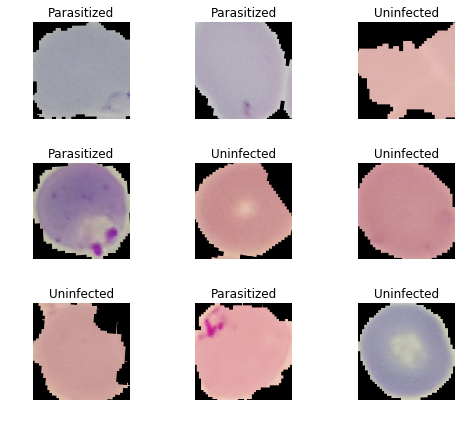

In [5]:
data.show_batch(rows = 3, figsize=(7,6))

In [6]:
learn = create_cnn(data, models.resnet50, metrics = error_rate, model_dir = '/tmp/model/')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 59634699.25it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


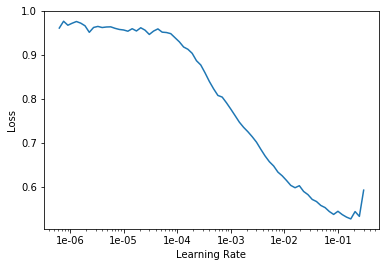

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(7, 1e-02)

epoch,train_loss,valid_loss,error_rate
1,0.160189,0.114895,0.040646
2,0.153523,0.120447,0.042642
3,0.147966,0.126188,0.042823
4,0.135801,0.097265,0.033206
5,0.106099,0.090031,0.033206
6,0.091810,0.077472,0.028488
7,0.091047,0.074150,0.026674


In [9]:
learn.save('model-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


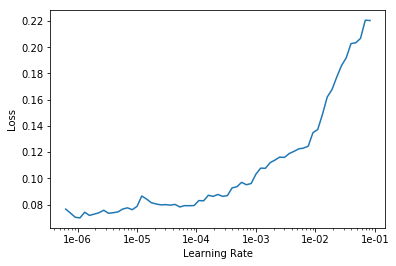

In [10]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.load('model-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (22047 items)
[Category Parasitized, Category Parasitized, Category Parasitized, Category Parasitized, Category Parasitized]...
Path: ../input/cell_images/cell_images
x: ImageItemList (22047 items)
[Image (3, 142, 139), Image (3, 136, 118), Image (3, 151, 124), Image (3, 163, 130), Image (3, 124, 130)]...
Path: ../input/cell_images/cell_images;

Valid: LabelList
y: CategoryList (5511 items)
[Category Uninfected, Category Uninfected, Category Parasitized, Category Parasitized, Category Uninfected]...
Path: ../input/cell_images/cell_images
x: ImageItemList (5511 items)
[Image (3, 151, 193), Image (3, 157, 154), Image (3, 127, 133), Image (3, 100, 127), Image (3, 154, 133)]...
Path: ../input/cell_images/cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [12]:
learn.fit_one_cycle(5, max_lr=slice(5e-6,5e-5))

epoch,train_loss,valid_loss,error_rate
1,0.083419,0.075491,0.026855
2,0.081302,0.073257,0.027944
3,0.079585,0.075280,0.026492
4,0.080600,0.070045,0.026674
5,0.080991,0.072018,0.027400


In [13]:
learn.save('model-2')

In [14]:
learn.load('model-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (22047 items)
[Category Parasitized, Category Parasitized, Category Parasitized, Category Parasitized, Category Parasitized]...
Path: ../input/cell_images/cell_images
x: ImageItemList (22047 items)
[Image (3, 142, 139), Image (3, 136, 118), Image (3, 151, 124), Image (3, 163, 130), Image (3, 124, 130)]...
Path: ../input/cell_images/cell_images;

Valid: LabelList
y: CategoryList (5511 items)
[Category Uninfected, Category Uninfected, Category Parasitized, Category Parasitized, Category Uninfected]...
Path: ../input/cell_images/cell_images
x: ImageItemList (5511 items)
[Image (3, 151, 193), Image (3, 157, 154), Image (3, 127, 133), Image (3, 100, 127), Image (3, 154, 133)]...
Path: ../input/cell_images/cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [15]:
intrep = ClassificationInterpretation.from_learner(learn)

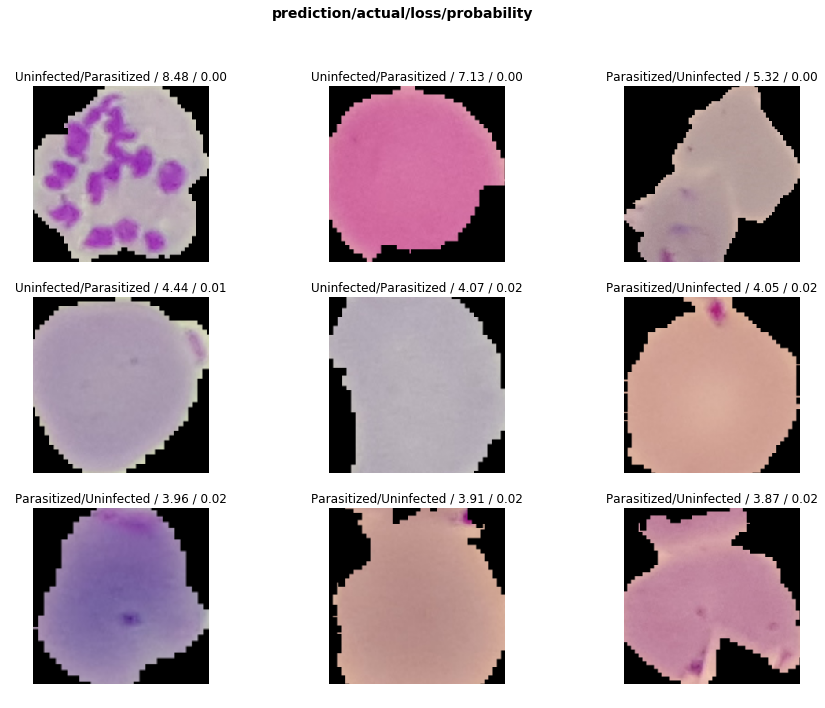

In [16]:
intrep.plot_top_losses(9, figsize = (15,11))

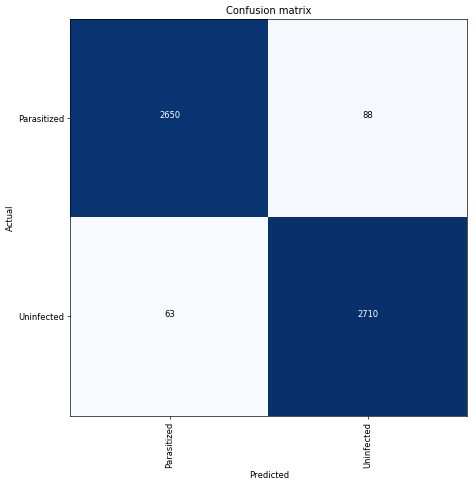

In [17]:
intrep.plot_confusion_matrix(figsize =(8,8), dpi = 60)

In [18]:
intrep.most_confused(min_val = 2)

[('Parasitized', 'Uninfected', 88), ('Uninfected', 'Parasitized', 63)]